# Forest Dataset - Random Forest & XGBoost

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib

In [3]:
# from ucimlrepo import fetch_ucirepo 
 
# # fetch dataset 
# covertype = fetch_ucirepo(id=31) 
 
# # data (as pandas dataframes) 
# X_df = covertype.data.features 
# y_ser = covertype.data.targets 
 
# # metadata 
# print(covertype.metadata) 
 
# # variable information 
# print(covertype.variables) 

In [4]:
# Load Dataset
df = pd.read_csv("forest_cover_type.csv")
print(df.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

In [5]:
# Features and Target
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"] - 1  # Make target zero-indexed for XGBoost

In [6]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest Classifier
# =========================

In [7]:

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [8]:
# Evaluation
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_prec = precision_score(y_test, y_pred_rf, average='weighted')
rf_rec = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     42368
           1       0.95      0.97      0.96     56661
           2       0.94      0.96      0.95      7151
           3       0.91      0.86      0.88       549
           4       0.95      0.78      0.86      1899
           5       0.93      0.89      0.91      3473
           6       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



In [9]:
# Cross-validation
rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("Random Forest CV Accuracy:", rf_cv_scores.mean())

Random Forest CV Accuracy: 0.5937984122099202


# XGBoost Classifier
# =========================

In [10]:

xgb = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

In [11]:
# Evaluation
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_prec = precision_score(y_test, y_pred_xgb, average='weighted')
xgb_rec = recall_score(y_test, y_pred_xgb, average='weighted')
xgb_f1 = f1_score(y_test, y_pred_xgb, average='weighted')

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85     42368
           1       0.87      0.90      0.88     56661
           2       0.89      0.91      0.90      7151
           3       0.88      0.86      0.87       549
           4       0.89      0.61      0.72      1899
           5       0.85      0.80      0.82      3473
           6       0.95      0.91      0.93      4102

    accuracy                           0.87    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.87      0.87      0.87    116203



In [12]:
# Cross-validation
xgb_cv_scores = cross_val_score(xgb, X, y, cv=5, scoring='accuracy')
print("XGBoost CV Accuracy:", xgb_cv_scores.mean())

XGBoost CV Accuracy: 0.5627491771081082


# Hyperparameter Tuning
# =========================

In [13]:
# Random Forest Grid Search (example)
rf_params = {"n_estimators": [100, 200], "max_depth": [None, 10, 20]}
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("Best RF Params:", rf_grid.best_params_)

Best RF Params: {'max_depth': None, 'n_estimators': 200}


In [ ]:
# XGBoost Grid Search (example)
xgb_params = {"n_estimators": [100, 200], "max_depth": [3, 6, 10]}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print("Best XGB Params:", xgb_grid.best_params_)

# Confusion Matrices
# =========================

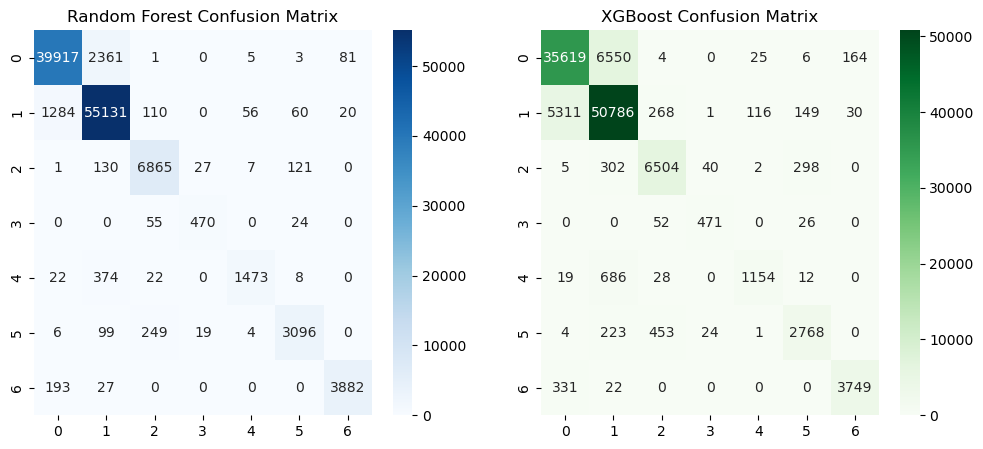

In [15]:

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("XGBoost Confusion Matrix")
plt.show()


# Feature Importances
# =========================

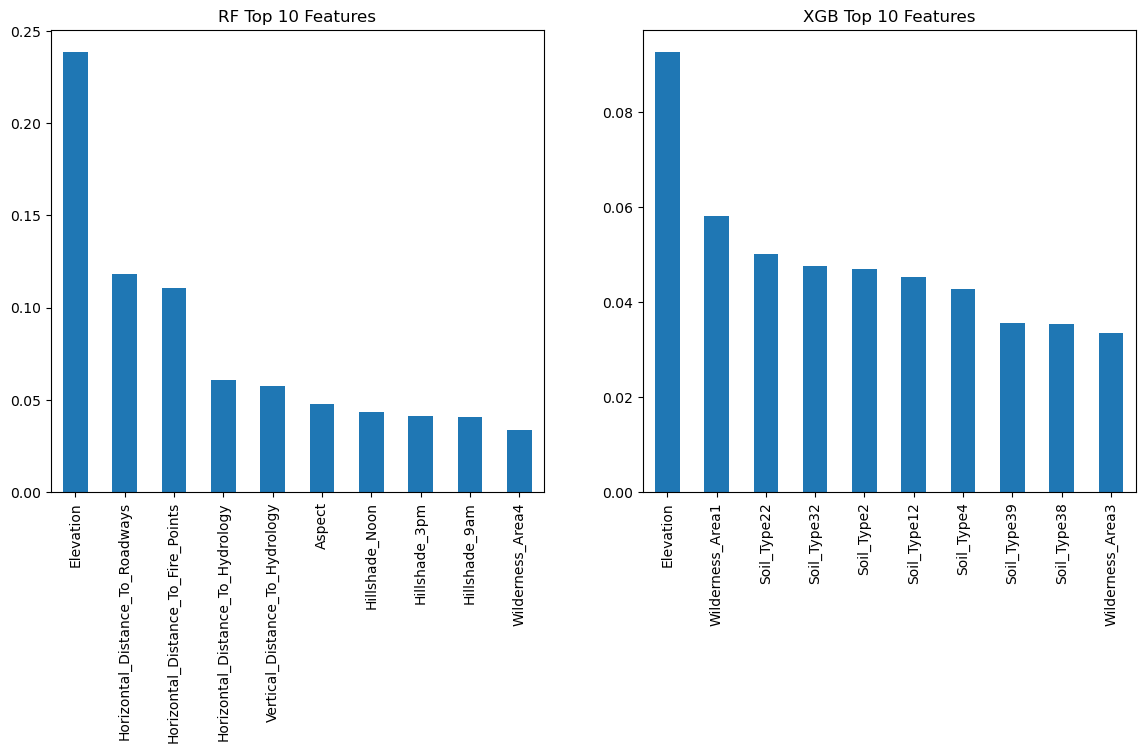

In [16]:
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
rf_importances.head(10).plot(kind='bar', ax=ax[0], title="RF Top 10 Features")
xgb_importances.head(10).plot(kind='bar', ax=ax[1], title="XGB Top 10 Features")
plt.show()

# Comparison Table (Final Results + CV)
# =========================

In [17]:

results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "Accuracy": [rf_acc, xgb_acc],
    "Precision": [rf_prec, xgb_prec],
    "Recall": [rf_rec, xgb_rec],
    "F1 Score": [rf_f1, xgb_f1],
    "CV Accuracy": [rf_cv_scores.mean(), xgb_cv_scores.mean()]
})

print("\n=== Model Comparison ===")
print(results)


=== Model Comparison ===
           Model  Accuracy  Precision    Recall  F1 Score  CV Accuracy
0  Random Forest  0.953796   0.953942  0.953796  0.953567     0.593798
1        XGBoost  0.869607   0.869732  0.869607  0.869023     0.562749


# Save Models
# =========================

In [ ]:

joblib.dump(rf, "random_forest_model.pkl")
joblib.dump(xgb, "xgboost_model.pkl")